In [1]:
import epa.model.workflow
model_set1 = epa.model.workflow.violation_state()

from drain import step
step.OUTPUTDIR = '/mnt/data/nysdec/epa-ny/drain/'

In [2]:
step.load(model_set1)

[FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_expr='aux.violation_state', region=None, rmp={},
        train_query='aux.evaluation_state', train_years=2, year=2013)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcom

In [3]:

model_set1[1].get_result()['feature_importances']

,feature,importance
649,handlers_facility_all_receive_date_max,0.045706
42,handler_age,0.019203
485,handlers_facility_5y_receive_date_max,0.012990
663,manifest_facility_all_approx_qty_max,0.012436
665,manifest_facility_all_approx_qty_mean,0.012069
667,manifest_facility_all_approx_qty_skew,0.011970
666,manifest_facility_all_approx_qty_std,0.011694
349,investigations_facility_all_start_date_days_max,0.011406
612,handlers_facility_all_handler_location_eq_mail...,0.011191
575,handlers_facility_all_handler_sqg_prop,0.010493


In [4]:
from drain import explore, model

In [5]:
df_forest = explore.to_dataframe(model_set1)

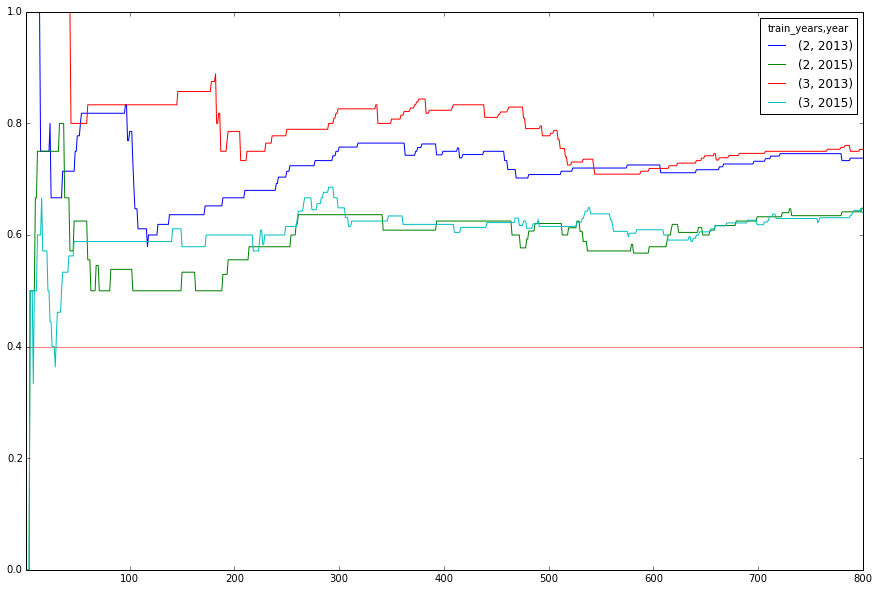

In [7]:
%matplotlib inline
plot = explore.apply(df_forest, model.precision_series, k=800, dropna=False).plot(figsize=(15,10))
plot.axhline(y=0.4,xmin=0,xmax=800,c="red",linewidth=0.5,zorder=0)

In [ ]:
#df_forest[(df_forest.train_years == 3) & (df_forest.year == 2013)]
import matplotlib as plt
plt.style.use('ggplot')
plot = explore.apply(df_forest[(df_forest.train_years == 3) & (df_forest.year == 2013)], model.precision_series, k=800, dropna=False).plot(figsize=(15,10))
plot.axhline(y=0.4,xmin=0,xmax=800,c="red",linewidth=0.5,zorder=0)

In [ ]:
explore.apply(df_forest, model.precision, k=800, dropna=False)

In [ ]:
explore.apply(df_forest, model.count)

In [14]:
plot = explore.apply(df_forest, model.count_series, k=500, dropna=False).plot(figsize=(15,10))

TypeError: cannot return std::string from Unicode object

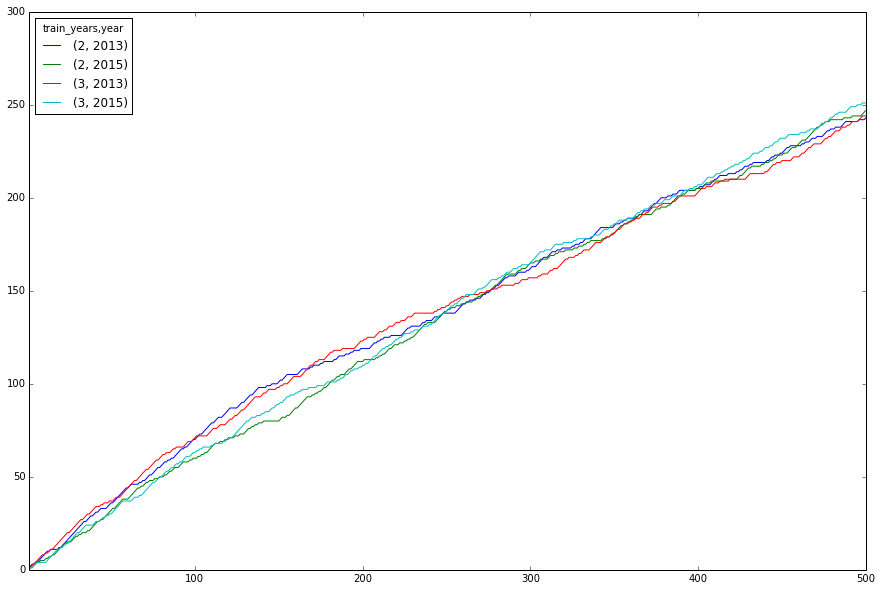

In [10]:
plot = explore.apply(df_forest, model.recall_series, k=500, dropna=True).plot(figsize=(15,10))

#.get_result['y'].sort by score descending and take first k rows

In [35]:
explore.apply(df, model.roc_auc)



AttributeError: 'module' object has no attribute 'roc_auc'

In [30]:
#.get_result['y'].sort by score descending and take first k rows
model_set1[0].get_result()['y'].sort_values('score', ascending = False).head(300).query('true == False')

,,true,score,active_today,br,enforcement,enforcement_epa,enforcement_state,evaluation,evaluation_epa,evaluation_state,...,region,state,violation,violation_epa,violation_state,violation_types,violation_types_epa,violation_types_state,last_investigation_days,last_investigation_date
rcra_id,date,,,,,,,,,,,,,,,,,,,,,
NYR000197780,2013-01-01,False,0.840000,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],NaN,NaT
NYR000202218,2013-01-01,False,0.736617,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],202.0,2012-06-13
NYD077444263,2013-01-01,False,0.734000,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],166.0,2012-07-19
NYD980593636,2013-01-01,False,0.726000,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],48.0,2012-11-14
NYD980592497,2013-01-01,False,0.720000,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],26.0,2012-12-06
NYR000182444,2013-01-01,False,0.720000,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],NaN,NaT
NYD002223550,2013-01-01,False,0.708000,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],1166.0,2009-10-23
NYR000162743,2013-01-01,False,0.698000,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],NaN,NaT


In [3]:
#### Looking at logistic regression results

model_set_logistic = model_set1 = epa.model.workflow.violation_state_logistic()
step.load(model_set_logistic)

[FitPredict(inputs=[Construct(C=0.1, __class_name__='sklearn.linear_model.LogisticRegression',
      penalty='l1'), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_expr='aux.violation_state', region=None, rmp={},
        train_query='aux.evaluation_state', train_years=2, year=2013)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(C=0.1, __class_name__='sklearn.linear_model.LogisticRegression',
      penalty='l1'), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_expr='aux.violation_state', region=None, rmp={},
        train_query='aux.evaluation_state', train

In [28]:
df = explore.to_dataframe(model_set_logistic)

In [29]:
df

,train_years,year,step
0,2,2013,"FitPredict(inputs=[Construct(C=0.1, __class_na..."
1,2,2015,"FitPredict(inputs=[Construct(C=0.1, __class_na..."
2,3,2013,"FitPredict(inputs=[Construct(C=0.1, __class_na..."
3,3,2015,"FitPredict(inputs=[Construct(C=0.1, __class_na..."


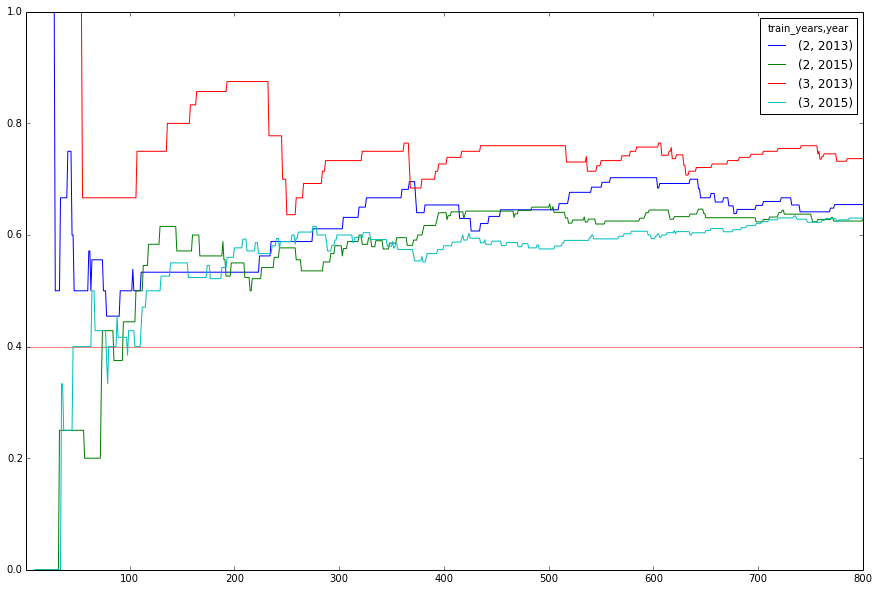

In [30]:
%matplotlib inline
plot = explore.apply(df, model.precision_series, k=800, dropna=False).plot(figsize=(15,10))
plot.axhline(y=0.4,xmin=0,xmax=500,c="red",linewidth=0.5,zorder=0)

In [19]:
model_set_logistic[0].get_result()['feature_importances']

,feature,importance
120,investigations_facility_5y_violation_prop,0.295445
728,naics2_33,0.202182
711,naics1_6,0.202150
281,investigations_facility_all_agency_epa_prop,0.201593
377,investigations_facility_all_sep_scheduled_comp...,0.192718
300,investigations_facility_all_violation_state_prop,0.188548
714,naics2_45,0.181064
630,handlers_facility_all_handler_sqg_prop,0.172221
663,handlers_facility_all_handler_include_in_br_prop,0.146721
388,icis_fec_facility_5y_st_lcl_penalty_max,0.125016


In [31]:
explore.apply(df, model.precision, k=800, dropna=False)

train_years  year
2            2013    0.654545
             2015    0.628866
3            2013    0.736842
             2015    0.630252
Name: step, dtype: float64

In [ ]:
# Load dataset ----- to check 
from 